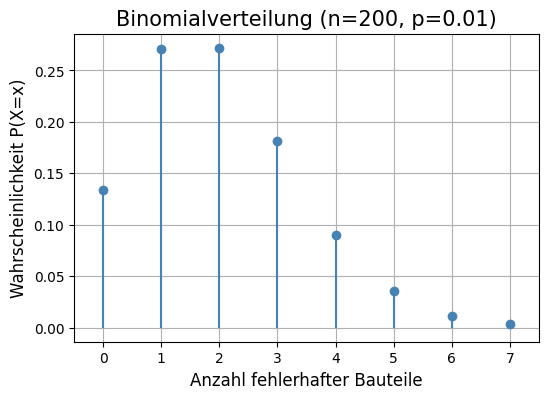

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Binomialverteilung Parameter
n = 200
p = 0.01

# Werte für X (Anzahl fehlerhafter Bauteile)
x = np.arange(0, n+1)

# Wahrscheinlichkeiten berechnen
probabilities = binom.pmf(x, n, p)
plt.figure(figsize=(6, 4))
# Plot erstellen (ohne use_line_collection)
plt.stem(x, probabilities, basefmt=" ", linefmt='steelblue', markerfmt='steelblue', label=f'n={n}, p={p}')
plt.title(f'Binomialverteilung (n={n}, p={p})', fontsize=15)
plt.xlabel('Anzahl fehlerhafter Bauteile', fontsize=12)
plt.xlim(-0.5,7.5)
plt.ylabel('Wahrscheinlichkeit P(X=x)', fontsize = 12)
plt.grid(True)

# Plot speichern
plt.savefig('binomplot.png', format='png')
plt.show()  # Zeigt den Plot an
plt.close()


<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Karl Marbach\AppData\Local\Temp\ipykernel_16136\1798785225.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.title(r'Log-Normalverteilung ($\mu_T=$' + f'{mu_T}, $\sigma_T=$' + f'{sigma_T})', fontsize=15)


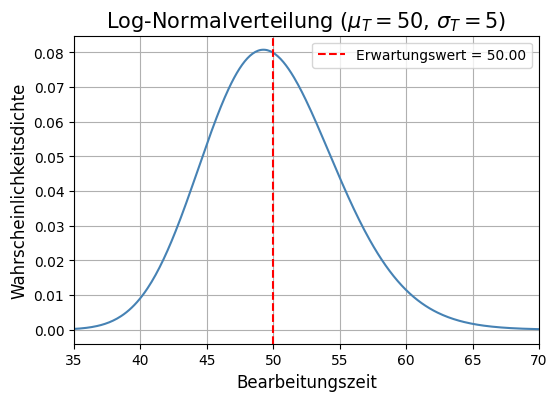

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Gegebene Planbearbeitungszeit (Mittelwert und Standardabweichung)
mu_T = 50  # Mittelwert der Planbearbeitungszeit (Log-Normalverteilung)
sigma_T = 5  # Standardabweichung der Planbearbeitungszeit (Log-Normalverteilung)

# Berechne die Parameter der zugrunde liegenden Normalverteilung
# Umkehrung der Formeln für die Log-Normalverteilung:
sigma = np.sqrt(np.log(1 + (sigma_T / mu_T)**2))  # Standardabweichung der Normalverteilung
mu = np.log(mu_T) - 0.5 * sigma**2  # Mittelwert der Normalverteilung

# Berechne den Mittelwert der Log-Normalverteilung
mean_lognorm = np.exp(mu + 0.5 * sigma**2)

# Generiere Daten für den Plot
x = np.linspace(0, 100, 1000)  # Werte für die X-Achse (Planbearbeitungszeit)
y = lognorm.pdf(x, sigma, scale=np.exp(mu))  # Berechnung der Wahrscheinlichkeitsdichtefunktion

# Plot erstellen
plt.figure(figsize=(6, 4))
plt.plot(x, y, color='steelblue')
#plt.title(f'Log-Normalverteilung (Mittelwert={mean_lognorm:.2f})', fontsize=15)
plt.title(r'Log-Normalverteilung ($\mu_T=$' + f'{mu_T}, $\sigma_T=$' + f'{sigma_T})', fontsize=15)
plt.xlabel('Bearbeitungszeit', fontsize=12)
plt.ylabel('Wahrscheinlichkeitsdichte', fontsize=12)
plt.xlim(35, 70)
plt.grid(True)

# Mittelwert einzeichnen
plt.axvline(mean_lognorm, color='red', linestyle='--', label=f'Erwartungswert = {mean_lognorm:.2f}')

# Legende hinzufügen
plt.legend()

# Plot speichern
plt.savefig('lognormplot.png', format='png')
plt.show()  # Zeigt den Plot an
plt.close()


In [21]:
sigma

0.0997513451195927

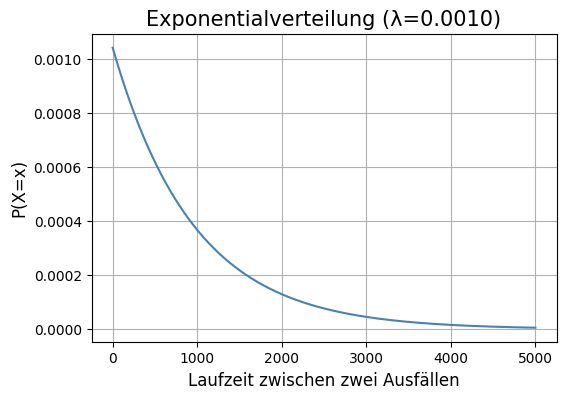

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Exponentialverteilung Parameter (mittlere Ausfallzeit = 960)
mean_time = 960
lambda_param = 1 / mean_time  # λ = 1 / mittlere Ausfallzeit

# Werte für X (Bereich für die Dichte)
x = np.linspace(0, 5000, 1000)  # x-Bereich, der zu einem mittleren Ausfallzeit passt

# Wahrscheinlichkeitsdichte (PDF) berechnen
pdf_values = expon.pdf(x, scale=1/lambda_param)

# Plot erstellen
plt.figure(figsize=(6, 4))
plt.plot(x, pdf_values, color='steelblue', label=f'Exponentialverteilung mit λ={lambda_param:.4f}')
plt.title(f'Exponentialverteilung (λ={lambda_param:.4f})', fontsize=15)
plt.xlabel('Laufzeit zwischen zwei Ausfällen', fontsize=12)
plt.ylabel('P(X=x)', fontsize=12)
plt.grid(True)

# Plot speichern
plt.savefig('exponplot.png', format='png')
plt.show()  # Zeigt den Plot an
plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.special import gamma

# Gegebene Werte
MTTF = 900  # mittlere Zeit zwischen Fehlern
k = 1.5     # Formparameter

# Berechnung des Skalenparameters lambda
lambda_ = MTTF / gamma(1 + 1 / k)

# Erstellen der Weibull-Verteilung
x = np.linspace(0, 3000, 500)  # Zeitpunkte für den Plot
pdf = weibull_min.pdf(x, k, scale=lambda_)  # PDF der Weibull-Verteilung

# Plot der Weibull-Verteilung
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Weibull-Verteilung (k={k}, λ={lambda_:.2f})', color='b')
plt.xlabel('Bearbeitungszeit zwischen zwei Maschinenausfällen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title(f'Weibull-Verteilung mit MTTF = {MTTF} und k = {k}')
plt.legend()
plt.grid(True)
plt.show()


: 

In [ ]:
!pip install scipy matplotlib numpy